In [1]:
!pip3 install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 985 kB 6.7 MB/s 
     |████████████████████████████████| 358 kB 61.9 MB/s 
     |████████████████████████████████| 139 kB 69.5 MB/s 
     |████████████████████████████████| 58 kB 6.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.11 which is incompatible.


In [2]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests 
import re

from selenium import webdriver

from time    import sleep , time 
from random  import randint
from IPython.core.display import clear_output




print('numpy version  - ' , np.__version__)
print('pandas version - ' , pd.__version__)

Unknown system... sorry~~~~
numpy version  -  1.21.6
pandas version -  1.3.5


<!DOCTYPE doctype html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="휴대용 냉장고 : 네이버 통합검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'휴대용 냉장고'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'휴대용 냉장고'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>휴대용 냉장고 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220818.css" rel="stylesheet" type="text/css"/> <link href="https:/
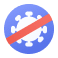
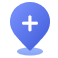
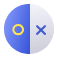
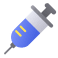

In [3]:
try :
    html = urlopen('https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%ED%9C%B4%EB%8C%80%EC%9A%A9+%EB%83%89%EC%9E%A5%EA%B3%A0&oquery=%EC%BA%A0%ED%95%91%EB%B6%88%ED%8C%90&tqi=hwLvwdprvxsssZkFxdZssssstuR-433010')
    # print(html.read())
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read() , 'html.parser')
    print(soup)

In [4]:
for price in soup.find_all('div', attrs = {'class' : 'price'}) :
    print(price.strong.get_text())

299,000
399,000
105,000
59,800
169,000
63,110
99,000
399,000


In [5]:
product_name = []
product_price = []

for product in soup.find_all('div', attrs = {'class' : 'product_info'}) :
  product_name.append(product.a.get_text())

for price in soup.find_all('div', attrs = {'class' : 'price'}) :
  product_price.append(price.strong.get_text())

print(product_name)
print(product_price)


['메타쿨 45L 휴대용냉장고 차박냉장고', '휴대 무선 이동식 캠핑용 차박 냉온장고 미니', '파세코 차량용 냉온장고 캠핑쿨러 휴대용 PCC-NH028AD', '차량용 냉장고 냉동고 캠핑 휴대용 딜팩토리 7.5L 시거잭', '해외알피쿨 차량용 가정용 캠핑용 냉장고 휴대용 아이스박스 T50', '카투어 미니 휴대용 냉장고 화물차 캠핑 차박 차량용', '쿠잉 차량용 냉장고 TCW-14 캠핑용 캠핑 미니 소형 냉온장고 냉동고 아이스박스 자동차 쿨러 휴대용 DC', '캠핑 차량용 휴대용 미니 냉장고 캠핑용 차량 냉온장고 냉동고 자동차']
['299,000', '399,000', '105,000', '59,800', '169,000', '63,110', '99,000', '399,000']


In [6]:
product_frm = pd.DataFrame({'product_name' : product_name,
               'product_price' : product_price})

product_frm

,product_name,product_price
0,메타쿨 45L 휴대용냉장고 차박냉장고,"299,000"
1,휴대 무선 이동식 캠핑용 차박 냉온장고 미니,"399,000"
2,파세코 차량용 냉온장고 캠핑쿨러 휴대용 PCC-NH028AD,"105,000"
3,차량용 냉장고 냉동고 캠핑 휴대용 딜팩토리 7.5L 시거잭,"59,800"
4,해외알피쿨 차량용 가정용 캠핑용 냉장고 휴대용 아이스박스 T50,"169,000"
5,카투어 미니 휴대용 냉장고 화물차 캠핑 차박 차량용,"63,110"
6,쿠잉 차량용 냉장고 TCW-14 캠핑용 캠핑 미니 소형 냉온장고 냉동고 아이스박스 ...,"99,000"
7,캠핑 차량용 휴대용 미니 냉장고 캠핑용 차량 냉온장고 냉동고 자동차,"399,000"
